In [1]:
pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


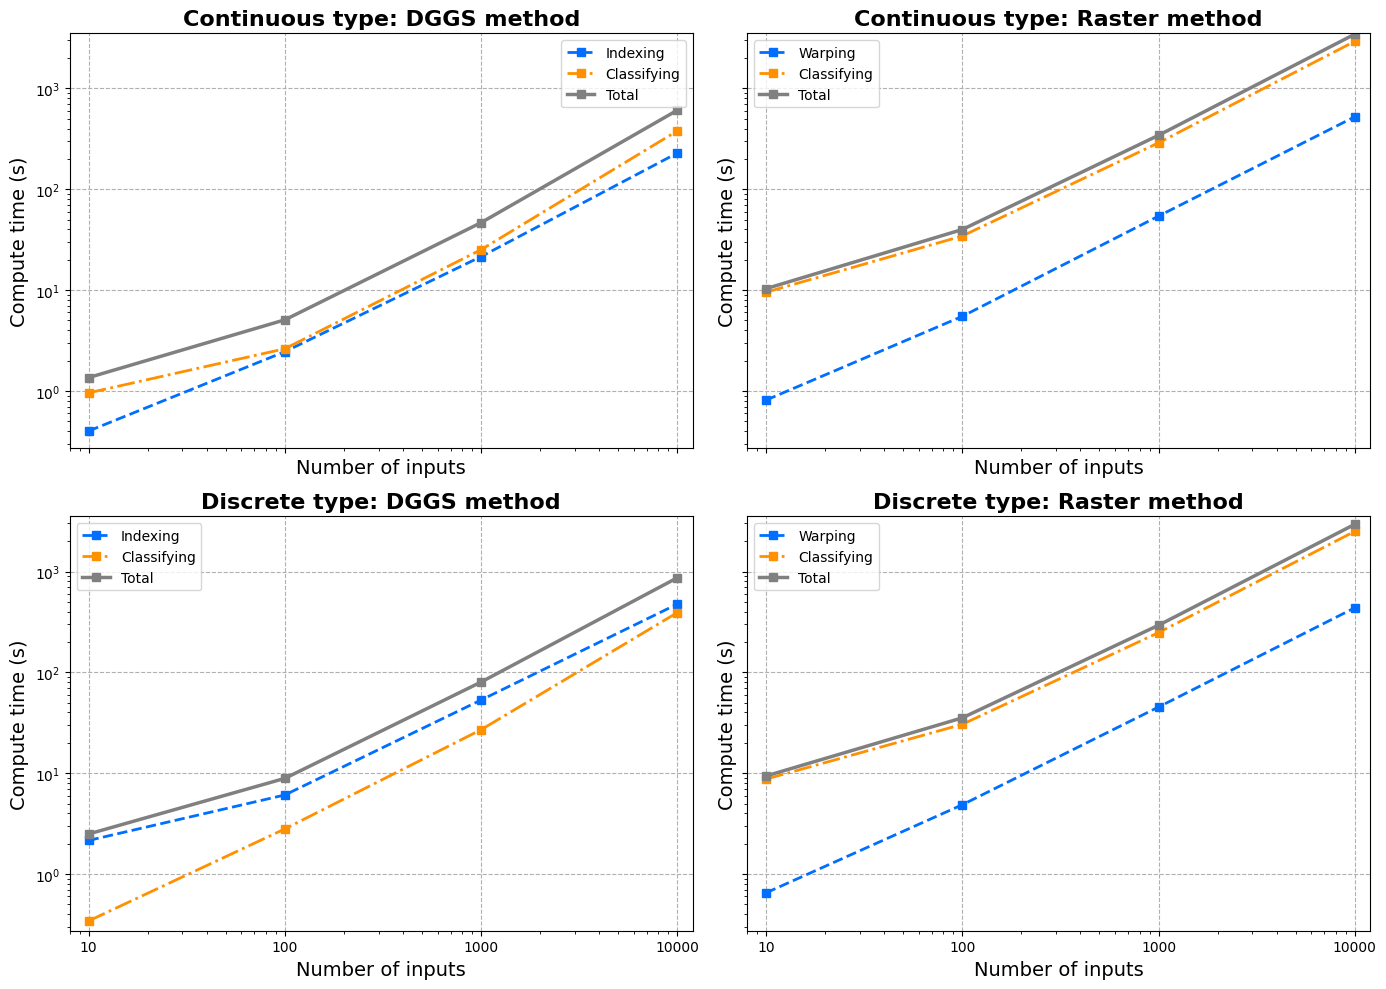

In [3]:
# Read the CSV data from a file into a pandas DataFrame
df = pd.read_csv('../Raster_benchmarking/Benchmark_times.csv') 

# Calculate the sum of 'time' for each combination of 'n_inputs', 'method', and 'type'
df_sum = df.groupby(['n_inputs', 'method', 'type'], as_index=False)['time'].sum()
df_sum['group'] = 'Total'  # Label the summed line as 'Total'

# Append the summed data back to the original DataFrame
df_combined = pd.concat([df, df_sum], ignore_index=True)

# Define the figure and axes for the layouts with DGGS on the left and Raster on the right
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

# Define point symbols and line styles for the "Group" variable, including the 'Total' group
point_symbols = {'indexing': 's', 'classifying': 's', 'warping': 's', 'Total': 's'}
line_styles = {'indexing': 'dashed', 'classifying': 'dashdot', 'warping': 'dashed', 'Total': 'solid'}

# Define colors for the groups
colors = {'indexing': '#006FFF', 'classifying': '#FF9000', 'warping': '#006FFF', 'Total': 'grey'}

# Get global min and max for time and n_inputs for consistent axis ranges
min_n_inputs, max_n_inputs = df['n_inputs'].min()*0.8, df['n_inputs'].max()*1.2
min_time, max_time = df['time'].min()*0.8, df['time'].max()*1.2

# Plot data with DGGS on the left and Raster on the right
methods = ['dggs', 'raster']
for i, method in enumerate(methods):
    for j, type_ in enumerate(df['type'].unique()[::-1]):
        ax = axes[j, i]
        
        # Filter the data for the current method and type
        filtered_data = df_combined[(df_combined['method'] == method) & (df_combined['type'] == type_)]
        
        # Plot each group separately
        for group in filtered_data['group'].unique():
            group_data = filtered_data[filtered_data['group'] == group]
            linewidth = 2.5 if group == 'Total' else 2
            ax.plot(
                group_data['n_inputs'], group_data['time'],
                marker=point_symbols[group], linestyle=line_styles[group],
                color=colors[group], linewidth=linewidth,
                label=group.title()
            )
        
        method_title = method.upper() if method == 'dggs' else method.capitalize()
        ax.set_title(f'{type_.capitalize()} type: {method_title} method', fontsize=16, fontweight='bold')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(min_n_inputs, max_n_inputs)
        ax.set_ylim(min_time, max_time)
        ax.set_xlabel('Number of inputs', fontsize=14)
        ax.set_ylabel('Compute time (s)', fontsize=14)
        ax.grid(True, which="major", ls="--")
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save the plot as EPS
plt.savefig('raster-results.eps', format='eps', dpi=1000)

# Save the plot as PNG
plt.savefig('raster-results.png', format='png', dpi=300)

plt.show()


/tmp/ipykernel_148200/2459627758.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


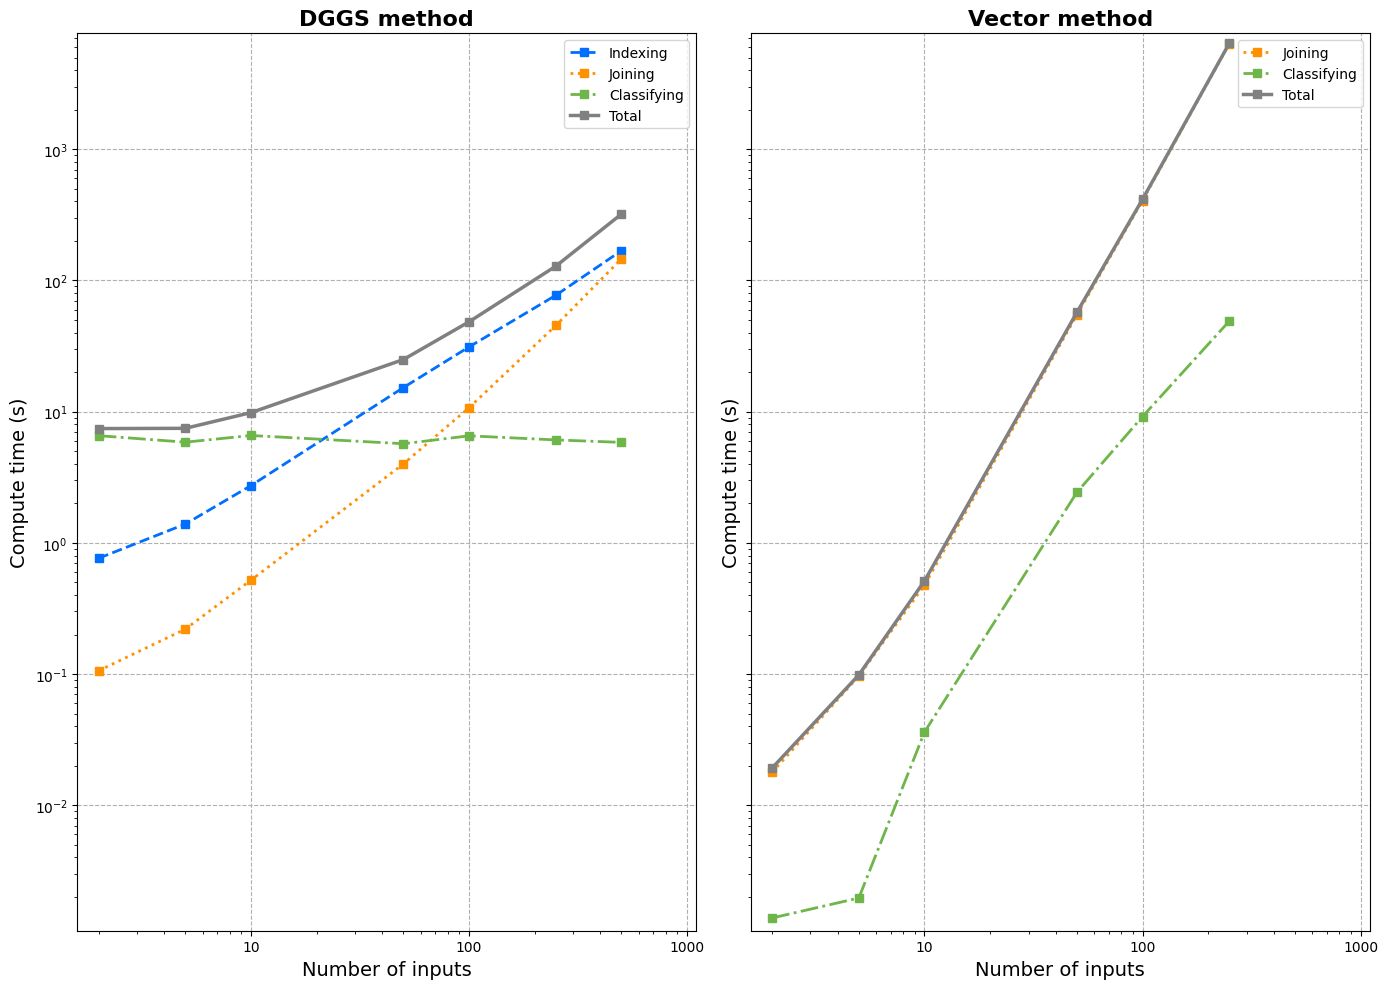

In [4]:
# Read the CSV data from a file into a pandas DataFrame
df = pd.read_csv('../Vector_benchmarking/Benchmark_times.csv') 

# Calculate the sum of 'time' for each combination of 'n_inputs', 'method', and 'type'
df_sum = df.groupby(['Inputs', 'Method'], as_index=False)['Time'].sum()
df_sum['Operation'] = 'Total'  # Label the summed line as 'Total'

# Append the summed data back to the original DataFrame
df_combined = pd.concat([df, df_sum], ignore_index=True).replace({0: np.nan})

# Define the figure and axes for the layouts with DGGS on the left and Raster on the right
fig, axes = plt.subplots(1, 2, figsize=(14, 10), sharex=True, sharey=True)

# Define point symbols and line styles for the "Group" variable, including the 'Total' group
point_symbols = {'Indexing': 's', 'Classifying': 's', 'Joining': 's', 'Total': 's'}
line_styles = {'Indexing': 'dashed', 'Classifying': 'dashdot', 'Joining': 'dotted', 'Total': 'solid'}

# Define colors for the groups
colors = {'Indexing': '#006FFF', 'Classifying': '#6EB54A', 'Joining': '#FF9000', 'Total': 'grey'}

# Get global min and max for time and n_inputs for consistent axis ranges
min_n_inputs, max_n_inputs = df_combined['Inputs'].min()*0.8, df['Inputs'].max()*2.2
min_time, max_time = df_combined['Time'].min()*0.8, df['Time'].max()*1.2

# Plot data with DGGS on the left and Raster on the right
methods = ['DGGS', 'Vector']
for i, method in enumerate(methods):
    for j, type_ in enumerate(df_combined['Operation'].unique()):
        ax = axes[i]
        
        # Filter the data for the current method and type
        filtered_data = df_combined[(df_combined['Method'] == method) & (df_combined['Operation'] == type_)]
        
        # Plot each group separately
        for group in filtered_data['Operation'].unique():
            group_data = filtered_data[filtered_data['Operation'] == group]
            linewidth = 2.5 if group == 'Total' else 2
            ax.plot(
                group_data['Inputs'], group_data['Time'],
                marker=point_symbols[group], linestyle=line_styles[group],
                color=colors[group], linewidth=linewidth,
                label=group.title()
            )
        
        ax.set_title(f'{method} method', fontsize=16, fontweight='bold')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(min_n_inputs, max_n_inputs)
        ax.set_ylim(min_time, max_time)
        ax.set_xlabel('Number of inputs', fontsize=14)
        ax.set_ylabel('Compute time (s)', fontsize=14)
        ax.grid(True, which="major", ls="--")
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
        ax.legend()

# Adjust layout
plt.tight_layout()

# Save the plot as EPS
plt.savefig('vector-results.eps', format='eps', dpi=1000)

# Save the plot as PNG
plt.savefig('vector-results.png', format='png', dpi=300)

plt.show()
